Text Classification using ML Model, Naive Bayes Classifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import re
import nltk

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = data.iloc[:,0:2]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.rename(columns={'v1': 'Label','v2': 'Message'}, inplace= True)
data.columns #column names have been changed

Index(['Label', 'Message'], dtype='object')

In [ ]:
data.Message = data.Message.astype(str)

In [ ]:
def clean_data(text):

    text = text.lower().strip()
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r"([-?.!,/\"])", r" \1 ", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,']", "", text)
    text = re.sub(r"[ ]+", " ", text)
    text = text.rstrip().strip()

    return text


In [ ]:
data['Clean_Message'] = data.Message.apply(clean_data)
data.head()  #we can compare both the columns to understand the difference

,Label,Message,Clean_Message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [ ]:
data.drop('Message', inplace = True, axis = 1)

In [ ]:
data.head()

,Label,Clean_Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [ ]:
data.Label.value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

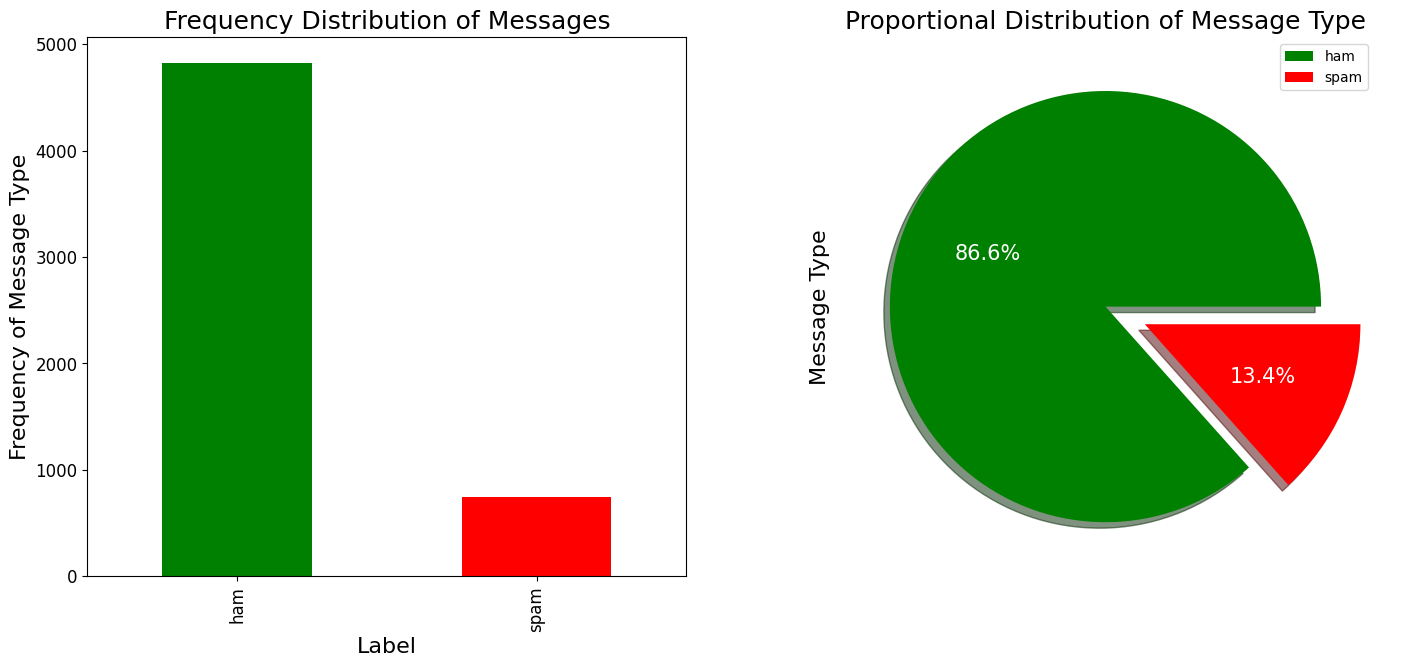

In [ ]:
# Plotting the Count and Proportional Distribution of Target Column
plt.figure(figsize=(17, 7))

plt.subplot(1, 2, 1)

# Plotting the count of spam and ham messages

data.Label.value_counts().plot(kind = 'bar', color = ['green', 'red'])

plt.xlabel('Label', fontsize=16)
plt.ylabel('Frequency of Message Type', fontsize=16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Frequency Distribution of Messages', fontsize=18)


plt.subplot(1,2,2)

# Plotting the proportion of spam and ham messages

data.Label.value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True, colors = ['green','red'],
                                  textprops={'fontsize':15, 'color':'white'})
plt.ylabel('Message Type', fontsize=16)
plt.title('Proportional Distribution of Message Type', fontsize=18)
plt.legend()


In [ ]:
wordcloud = WordCloud(width=2500, height=2500, max_words=100,
                      background_color='Black', colormap='Greens_r'
                      ).generate(str(data[data.Label == 'ham']['Clean_Message']))

(-0.5, 2499.5, 2499.5, -0.5)

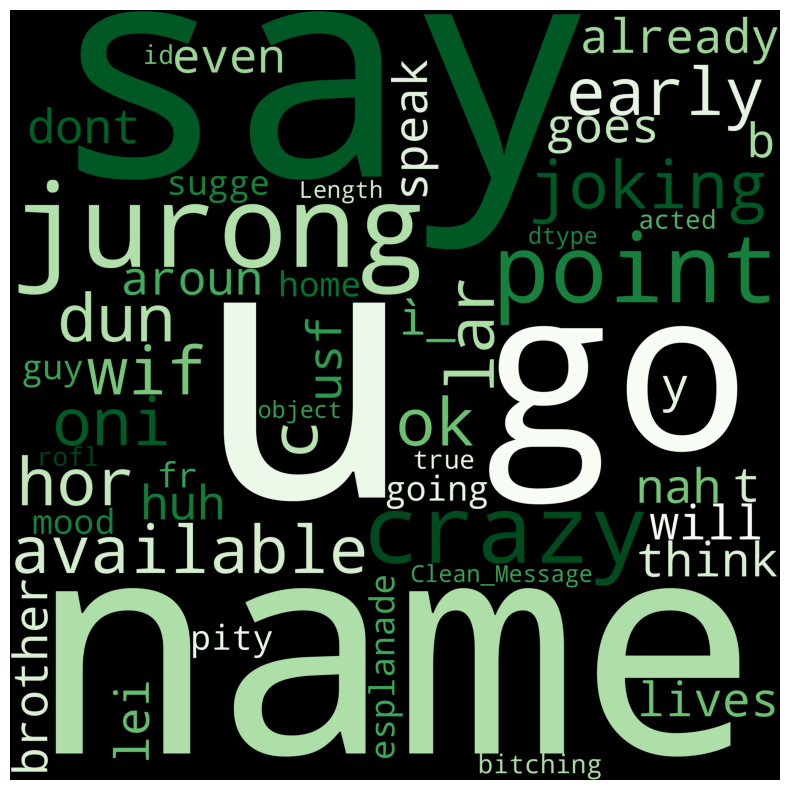

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
wordcloud = WordCloud(width=2500, height=2500, max_words=100,
                      background_color='Black', colormap='Reds_r'
                      ).generate(str(data[data.Label == 'spam']['Clean_Message']))

(-0.5, 2499.5, 2499.5, -0.5)

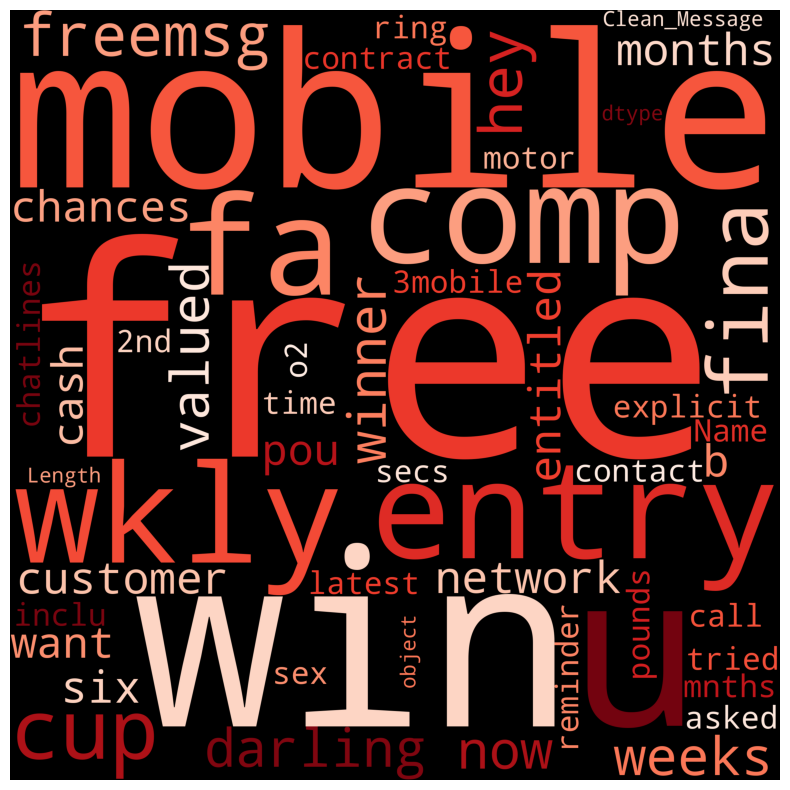

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
ps = PorterStemmer()  #initializing the Stemmer object
def clean_text(text):
    text = text.split()
    new_text = [ps.stem(word) for word in text if word not in stopwords.words('english')]
    new_text = " ".join(new_text)
    return new_text

In [ ]:
data.head()

,Label,Clean_Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [ ]:
X = data.Clean_Message.values
X[:5]

array(['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
       'ok lar joking wif u oni',
       'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratet&cs apply 08452810075over18s',
       'u dun say so early hor u c already then say',
       'nah i dont think he goes to usf he lives around here though'],
      dtype=object)

In [ ]:
y = data.Label.values
y[:5]

array(['ham', 'ham', 'spam', 'ham', 'ham'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (4457,) (4457,)
Testing Data Shape: (1115,) (1115,)


In [ ]:
cv = CountVectorizer()

In [ ]:
nb_pipeline = Pipeline([('vect', cv), ('clf', MultinomialNB())])

In [ ]:
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', MultinomialNB())])

In [ ]:
y_pred = nb_pipeline.predict_proba(X_test)

#probabilities for first 5 messages in test data
y_pred[:5]

array([[9.97840112e-01, 2.15988796e-03],
       [1.00000000e+00, 1.05743830e-12],
       [7.04775526e-04, 9.99295224e-01],
       [1.00000000e+00, 8.02523661e-15],
       [3.63476499e-26, 1.00000000e+00]])

In [ ]:
y_pred = nb_pipeline.predict(X_test)
y_pred[:5]

array(['ham', 'ham', 'spam', 'ham', 'spam'], dtype='<U4')

In [ ]:
print('Model Accuracy for the Train set:', nb_pipeline.score(X_train, y_train))

Model Accuracy for the Train set: 0.9939421135292797


In [ ]:
print('Model Accuracy for the Test set:', nb_pipeline.score(X_test, y_test))

Model Accuracy for the Test set: 0.9829596412556054


In [ ]:
a1=m.accuracy_score(y_test, y_pred)
a1

0.9829596412556054

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[963,   2],
       [ 17, 133]])

Text(95.72222222222221, 0.5, 'Truth')

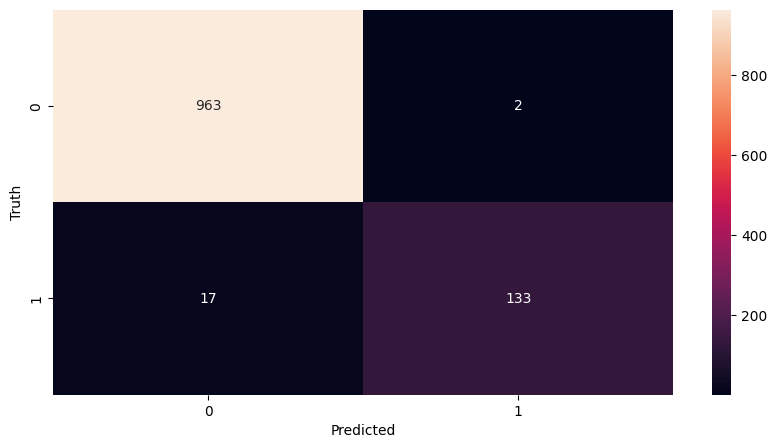

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
evaluation_df = pd.DataFrame({'Message': X_test, 'Actual Label': y_test, 'Predicted Label': y_pred})
evaluation_df.head(10)

,Message,Actual Label,Predicted Label
0,funny fact nobody teaches volcanoes 2 erupt ts...,ham,ham
1,i sent my scores to sophas and i had to do sec...,ham,ham
2,we know someone who you know that fancies you ...,spam,spam
3,only if you promise your getting out as soon a...,ham,ham
4,congratulations ur awarded either å£500 of cd ...,spam,spam
5,ill text carlos and let you know hang on,ham,ham
6,k i didt see you kwhere are you now,ham,ham
7,no message no responce what happend,ham,ham
8,get down in gandhipuram and walk to cross cut ...,ham,ham
9,you flippin your shit yet,ham,ham


Text Classification using CNN Model

In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
import sklearn.metrics as m



In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data.rename(columns={'v1': 'Label','v2': 'Message'}, inplace= True)
data.columns #column names have been changed

Index(['Label', 'Clean_Message'], dtype='object')

In [ ]:
sent=data.iloc[:,[1]]['Clean_Message']
sent

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ì_ b going to esplanade fr home
5569    pity * was in mood for that so any other sugge...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Clean_Message, Length: 5572, dtype: object

In [ ]:
labels=data.iloc[:,[0]]['Label']
labels

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Label, Length: 5572, dtype: object

In [ ]:
le=LabelEncoder()
labels=le.fit_transform(labels)
labels

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
import re
lemma=WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
sentences=[]
for j in range(0,len(sent)):
  s=re.sub('[^A-Za-z]',' ',sent[j])
  s=s.lower()
  words=word_tokenize(s)
  words=[lemma.lemmatize(i) for i in words if i not in stopwords.words('english')]
  s=' '.join(words)
  sentences.append(s)

In [ ]:
sentences

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratet c apply',
 'u dun say early hor u c already say',
 'nah dont think go usf life around though',
 'freemsg hey darling week word back id like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'im gon na home soon dont want talk stuff anymore tonight k ive cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net 

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
one_hot_sent=[one_hot(i,10000) for i in sentences]

In [ ]:
maxi=[len(i) for i in one_hot_sent]

In [ ]:
max(maxi)

77

In [ ]:
from tensorflow.keras.preprocessing.sequence import  pad_sequences
padsequences=pad_sequences(one_hot_sent,maxlen=80)
padsequences

array([[   0,    0,    0, ..., 7315, 7459, 9524],
       [   0,    0,    0, ..., 3734, 8656, 2552],
       [   0,    0,    0, ..., 7679, 6501, 6741],
       ...,
       [   0,    0,    0, ..., 4512, 5805, 3164],
       [   0,    0,    0, ..., 6821, 8656, 7250],
       [   0,    0,    0, ..., 9371, 5035, 3219]], dtype=int32)

In [ ]:
feature_train,feature_test,label_train,label_test=train_test_split(padsequences,labels,test_size=0.2,random_state=7)

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

# Build CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(10000, 64, input_length=80))  # Specify input_length for padding
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(2, activation='sigmoid'))

# Compile CNN model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

# Train CNN model
cnn_model.fit(feature_train, label_train, epochs=20, validation_data=(feature_test, label_test))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 64)            640000    
                                                                 
 conv1d (Conv1D)             (None, 76, 128)           41088     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 2)                 258       
                                                                 
Total params: 697858 (2.66 MB)
Trainable params: 697858 (2.66 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
label_pred1=cnn_model.predict(feature_test)

35/35 [==============================] - 1s 11ms/step


In [ ]:
label_pred1

array([[9.9999988e-01, 6.9316627e-08],
       [9.9994773e-01, 6.0913688e-05],
       [9.9999946e-01, 6.2701110e-07],
       ...,
       [9.9999994e-01, 9.4119770e-08],
       [9.9999964e-01, 4.5568467e-07],
       [1.0000000e+00, 6.9066469e-10]], dtype=float32)

In [ ]:
label_pred_1=[np.argmax(i,axis=0) for i in label_pred]
label_pred_1[0:5]

[0, 0, 0, 0, 0]

In [ ]:
label_test_1=[np.argmax(i,axis=0) for i in label_test]
label_test_1[0:5]

[0, 0, 0, 0, 0]

In [ ]:
a2=m.accuracy_score(label_test_1,label_pred_1)
a2

0.9820627802690582

Text(95.72222222222221, 0.5, 'Truth')

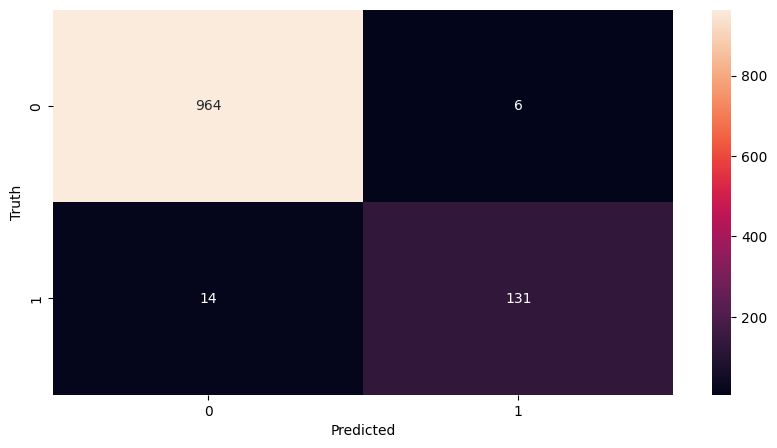

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(label_test_1,label_pred_1)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(label_test_1,label_pred_1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       970
           1       0.96      0.90      0.93       145

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
a3=0.99

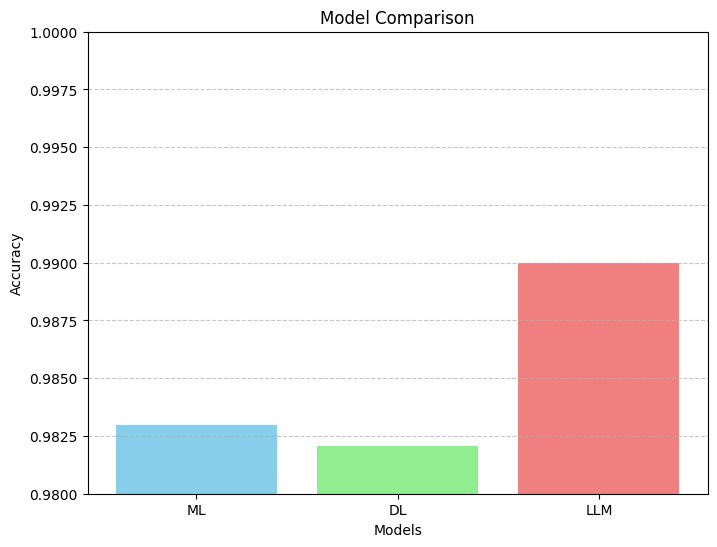

In [ ]:
import matplotlib.pyplot as plt

models = ['ML', 'DL', 'LLM']
accuracies = [a1, a2, a3]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.98, 1)  # Set y-axis limits for better visualization
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


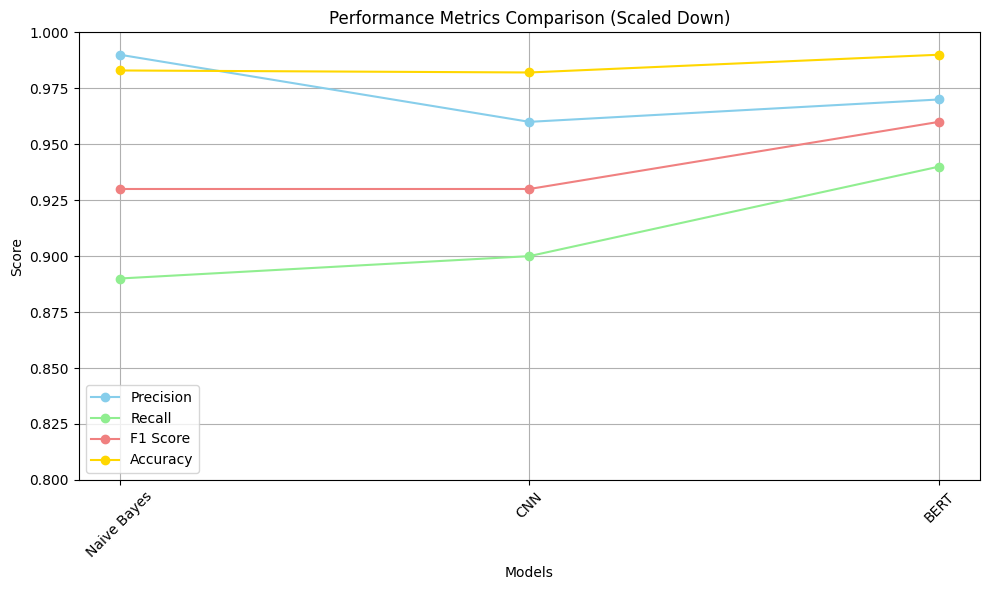

In [ ]:
import matplotlib.pyplot as plt

# Replace placeholders with scaled-down metric values
models = ['Naive Bayes', 'CNN', 'BERT']
precisions = [0.99, 0.96, 0.97]
recalls = [0.89, 0.90, 0.94]
f1_scores = [0.93, 0.93, 0.96]
accuracies = [a1, a2, a3] # Scaled down values for better visualization

plt.figure(figsize=(10, 6))

# Plot precision
plt.plot(models, precisions, marker='o', color='skyblue', label='Precision')

# Plot recall
plt.plot(models, recalls, marker='o', color='lightgreen', label='Recall')

# Plot F1 score
plt.plot(models, f1_scores, marker='o', color='lightcoral', label='F1 Score')

# Plot accuracy
plt.plot(models, accuracies, marker='o', color='gold', label='Accuracy')

plt.title('Performance Metrics Comparison (Scaled Down)')
plt.ylim(0.8, 1)  # Adjusted y-axis limits for scaled-down values
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()
